In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from modular.number_generator import Exponential_Generator, Uniform_Generator
from modular.Engine import Storage_Simulator


In [36]:
demand_intervals_seed = 1985072130
delay_seed = 748932582
demand_seed = 1631331038

demand_intervals = Uniform_Generator(seed=demand_intervals_seed)
demand = Exponential_Generator(seed=demand_seed, mean=5)
delay = Uniform_Generator(seed=delay_seed)
# for _ in range(20):
    # print(f"{demand.next_number():.4f}")

===========policy := [ s = 20 and S = 200 ]================
Mean Holding costs is : 129.5311947084057
Mean Shortage costs is : 1.339229760085919
Mean Order cost is : 18768.740757567186
Mean Total cost is : 18899.61118203568
Percentage of lackness weeks : 3.841861675027758



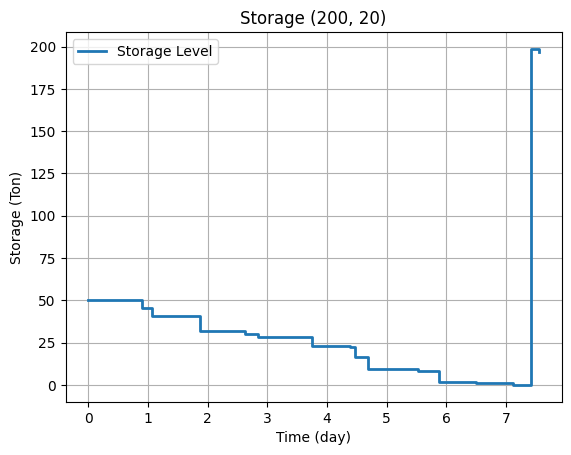

In [96]:
model = Storage_Simulator(demand_generator=demand,
                          demand_interval_generator=demand_intervals,
                          delay_generator=delay,
                          fixed_cost=15,
                          variable_cost=2,
                          pos_cost=5.2,
                          neg_cost=520,
                          initial_level=50)

# [S, s]
policies = [[200, 20]]
model.fit(time_limit=8, policies=policies)
model.plot_it()

In [103]:
model.storage.negative_days

0.30734893400222063

In [105]:
model.storage.history

{0.9074887400493026: -4.592944292857931,
 1.0707427486777306: -4.99981437630049,
 1.8808657666668296: -8.593127843150006,
 2.618429109454155: -1.7546567964837183,
 2.845531336031854: -2.0238834514291564,
 3.7526534274220467: -4.80102298269845,
 3.7536434223875403: -0.18211107476944124,
 4.392488807439804: -0.7216093271768806,
 4.466875380836427: -6.154397525804156,
 4.682014457881451: -7.081099122167403,
 5.524482353590429: -0.676462224358625,
 5.882405534386635: -6.940755814973341,
 6.497305176220834: -0.22801360263459777,
 7.11558548361063: -1.3171378633285367,
 7.422934417612851: 198.7498984348042,
 7.5527117839083076: -1.6293062547365667}

In [104]:
len(model.y_values), model.y_values[-5:-1]

(17,
 [1.4781151678303948,
  1.250101565195797,
  -0.0670362981327397,
  198.68286213667147])

In [99]:
c = 0
for i in model.y_values:
    c = c+1 if i<0 else c

c

1

In [108]:
(0.3073/8)*100

3.84125